### Understand the business scenario and problem
The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to me as a data analytics professional and ask me to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

My goals in this project is to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If I can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## HR-Dataset
Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [68]:

# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
from matplotlib import pyplot as plt
import seaborn as sns


# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load Dataset

In [69]:
hr_data =   pd.read_csv('HR_Data.csv')

In [70]:
hr_data.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

### Initail EDA and data cleaning

In [71]:
hr_data.shape

(14999, 10)

In [72]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [73]:
hr_data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

#### Rename Columns

In [74]:
# display all columns
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [75]:
# rename columns as needed
hr_data.rename(columns={'number_project':'number_projects',
                        'average_montly_hours': 'average_monthly_hours',
                        'time_spend_company':'tenure',
                        'Work_accident':'work_accident',
                        'Department':'department'}, inplace=True)

In [76]:
# Display all column names after the update
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

#### Check missing calues

In [77]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_projects          0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

#### Check dublicates

In [78]:
duplicates = hr_data.duplicated(keep=False)
duplicates.sum()

5346

In [79]:
hr_data[duplicates].sort_values(by=list(hr_data.columns), ascending=False)

satisfaction_level  last_evaluation  number_projects  \
10691                1.00             0.93                5   
12902                1.00             0.93                5   
11375                1.00             0.93                5   
13586                1.00             0.93                5   
10878                1.00             0.88                6   
...                   ...              ...              ...   
12071                0.09             0.77                5   
14282                0.09             0.77                5   
30                   0.09             0.62                6   
12030                0.09             0.62                6   
14241                0.09             0.62                6   

       average_monthly_hours  tenure  work_accident  left  \
10691                    231       2              0     0   
12902                    231       2              0     0   
11375                    167       3              0     0   
13586                    167       3              0     0   
10878                    201       4              0     0   
...                      ...     ...            ...   ...   
12071                    275       4              0     1   
14282                    275       4              0     1   
30                       294       4              0     1   
12030                    294       4              0     1   
14241                    294       4              0     1   

       promotion_last_5years   department  salary  
10691                      0    marketing  medium  
12902                      0    marketing  medium  
11375                      0        sales  medium  
13586                      0        sales  medium  
10878                      0    technical     low  
...                      ...          ...     ...  
12071                      0  product_mng  medium  
14282                      0  product_mng  medium  
30                         0   accounting     low  
12030                      0   accounting     low  
14241                      0   accounting     low  

[5346 rows x 10 columns]

In [80]:
# calculate probability for a specific duplicate

# Select one of your duplicate rows as an example
example_dup = hr_data[hr_data.duplicated()].iloc[0]

# Calculate the probability of each value occurring in its respective column
likelihood = 1.0
for col in hr_data.columns:
    # Frequency of that specific value in the whole dataset
    prob = (hr_data[col] == example_dup[col]).mean()
    likelihood *= prob
    print(f"P({col} = {example_dup[col]}) = {prob:.4f}")

print(f"\nTotal Likelihood of this profile: {likelihood:.20f}")

P(satisfaction_level = 0.46) = 0.0063
P(last_evaluation = 0.57) = 0.0222
P(number_projects = 2) = 0.1592
P(average_monthly_hours = 139) = 0.0080
P(tenure = 3) = 0.4296
P(work_accident = 0) = 0.8554
P(left = 1) = 0.2381
P(promotion_last_5years = 0) = 0.9787
P(department = sales) = 0.2760
P(salary = low) = 0.4878

Total Likelihood of this profile: 0.00000000206473865010


In [81]:
# drop duplicates
hr_data = hr_data.drop_duplicates(keep='first')

In [82]:
# check for duplicates after the update
duplicates = hr_data.duplicated(keep=False)
duplicates.sum()

0

#### Check for outliers

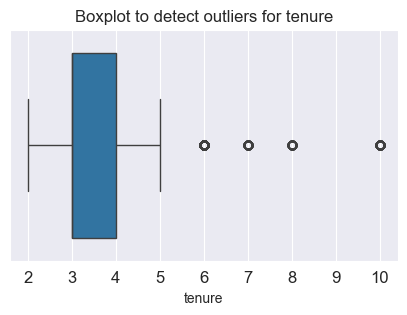

In [83]:
plt.figure(figsize=(5,3))
plt.title('Boxplot to detect outliers for tenure')
plt.xticks(fontsize=12)
sns.boxplot(x=hr_data['tenure'])
plt.show()

The boxplot above shows that there are outliers in the tenure variable.
It would be helpful to investigate how many rows in the data contain outliers in the tenure column.

In [84]:
# Determine the number of rows containing outliers

# Compute the 25th percentile value in tenure
percentile25th = hr_data['tenure'].quantile(0.25)

# Compute the 75th percentile value in tenure
percentile75th = hr_data['tenure'].quantile(0.75)

# Compute the interquartile range in  tenure
iqr = percentile75th - percentile25th

# Define the upper limit and lower limit for non-outlier values in tenure
lower_limit = percentile25th - 1.5 * iqr
print('Lower Limit: ',lower_limit)
upper_limit = percentile75th + 1.5 * iqr
print('Upper Limit: ',upper_limit)

outliers = hr_data[(hr_data['tenure']<lower_limit) | (hr_data['tenure']> upper_limit)]
print('Number of outliers: ', len(outliers))

Lower Limit:  1.5
Upper Limit:  5.5
Number of outliers:  824


### PACE Analyze State

In [85]:
# how many people left the company?
print(hr_data['left'].value_counts())

# how many people left in perccent?
print(hr_data['left'].value_counts(normalize= True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


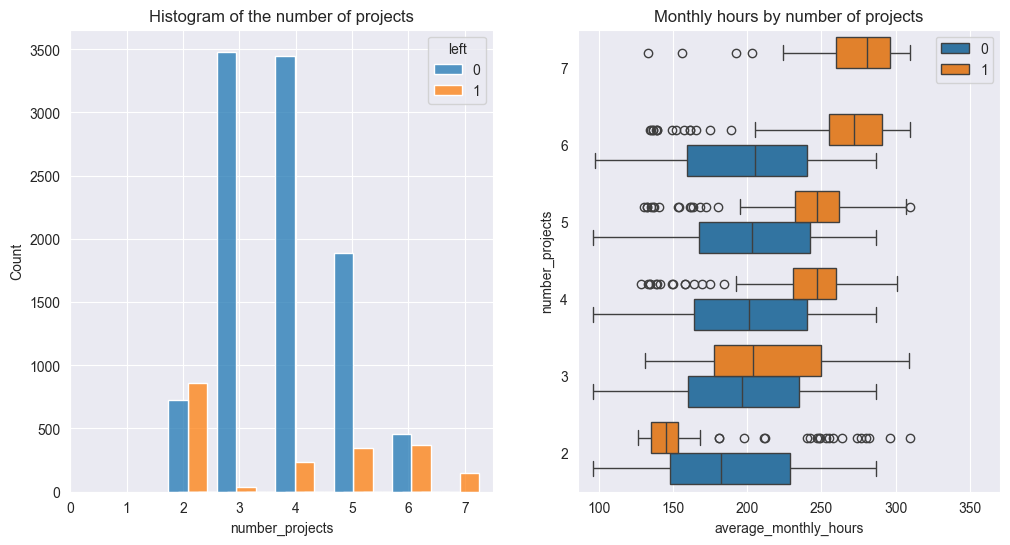

In [86]:
fif, ax = plt.subplots(1,2, figsize = (12,6))

# create a histogram showing the distribution of 'number_projects', comparing employees who stayed versus those who left
sns.histplot(data= hr_data, x='number_projects', hue='left',multiple='dodge', shrink=4, ax=ax[0])
ax[0].set_xlim(0, hr_data['number_projects'].max() + 0.5)
ax[0].set_title('Histogram of the number of projects')

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those
sns.boxplot(data= hr_data, y='number_projects',x='average_monthly_hours', hue='left',orient='h',ax=ax[1])
ax[1].invert_yaxis()
left_limit, right_limit = ax[1].get_xlim()
ax[1].set_xlim(left_limit, right_limit+50)
ax[1].legend(loc= 'upper right')
ax[1].set_title('Monthly hours by number of projects')
plt.show()

What is interisting?

1. There exist 2 groups of people, who left the company: (A) those who worked less than their peers with the same number of projects(with 2 projects) and (B) those who worked much more. It is possible that those of group (A) where fired, because of their performance or they already given their notice.
2. Everyone with 7 projects left the company and they worked mostly (interquartiles) between ~260-295 hours/ per month. This is much more than any other group
3. The optimal number of projects is between 3 and 4 projects, because the ratio of left/stayed is very small, but also for 5 projects it is much better than the other ratios
4. If you assume an average week of 40 hours (ignoring vations because of missing information), then the average workong hours per month of employees working Monday-Friday = 52 weeks * 40 hours per week / 12 month = 173.33 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.


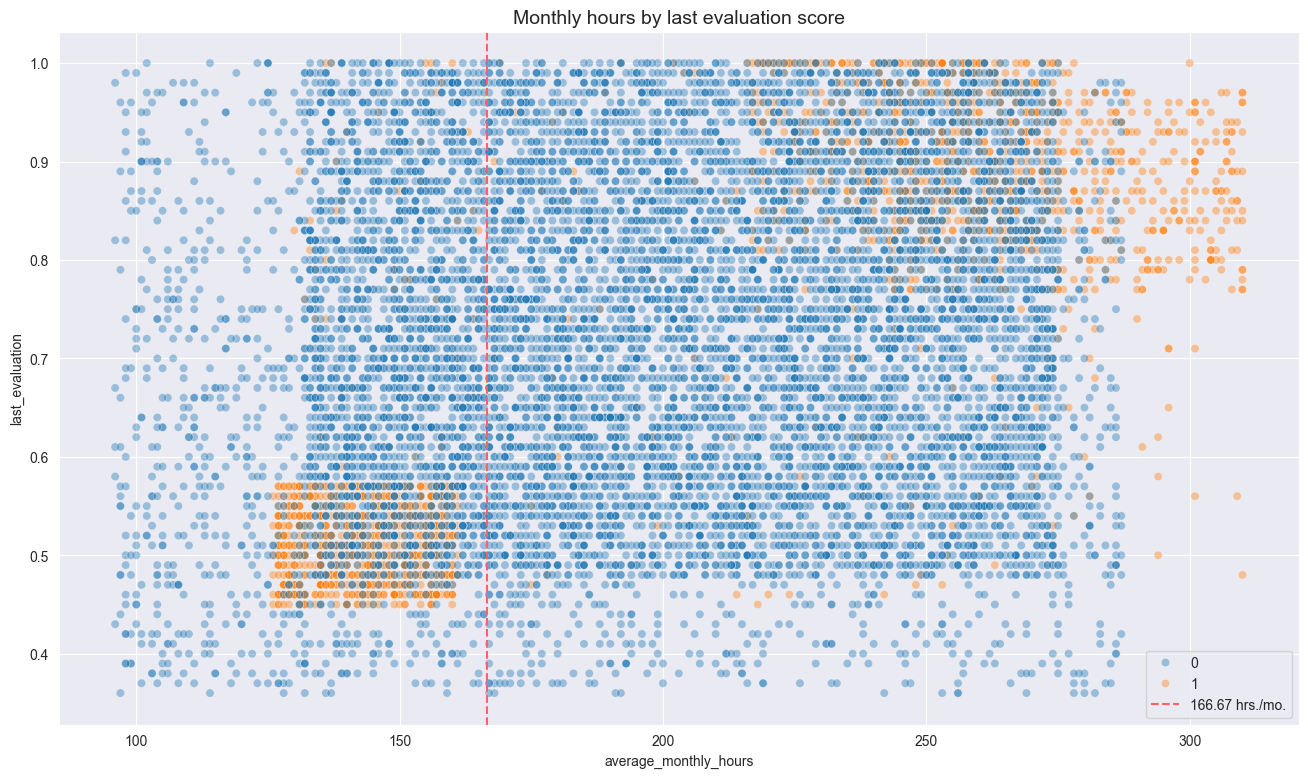

In [87]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=hr_data, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend()
plt.title('Monthly hours by last evaluation score', fontsize='14')
plt.show()

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
- There seems to be a correlation between hours worked and evaluation score.
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Now examine the correlation with the satisfaction level



In [88]:
hr_data.groupby(['left'])['satisfaction_level'].agg(['mean', 'median'])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

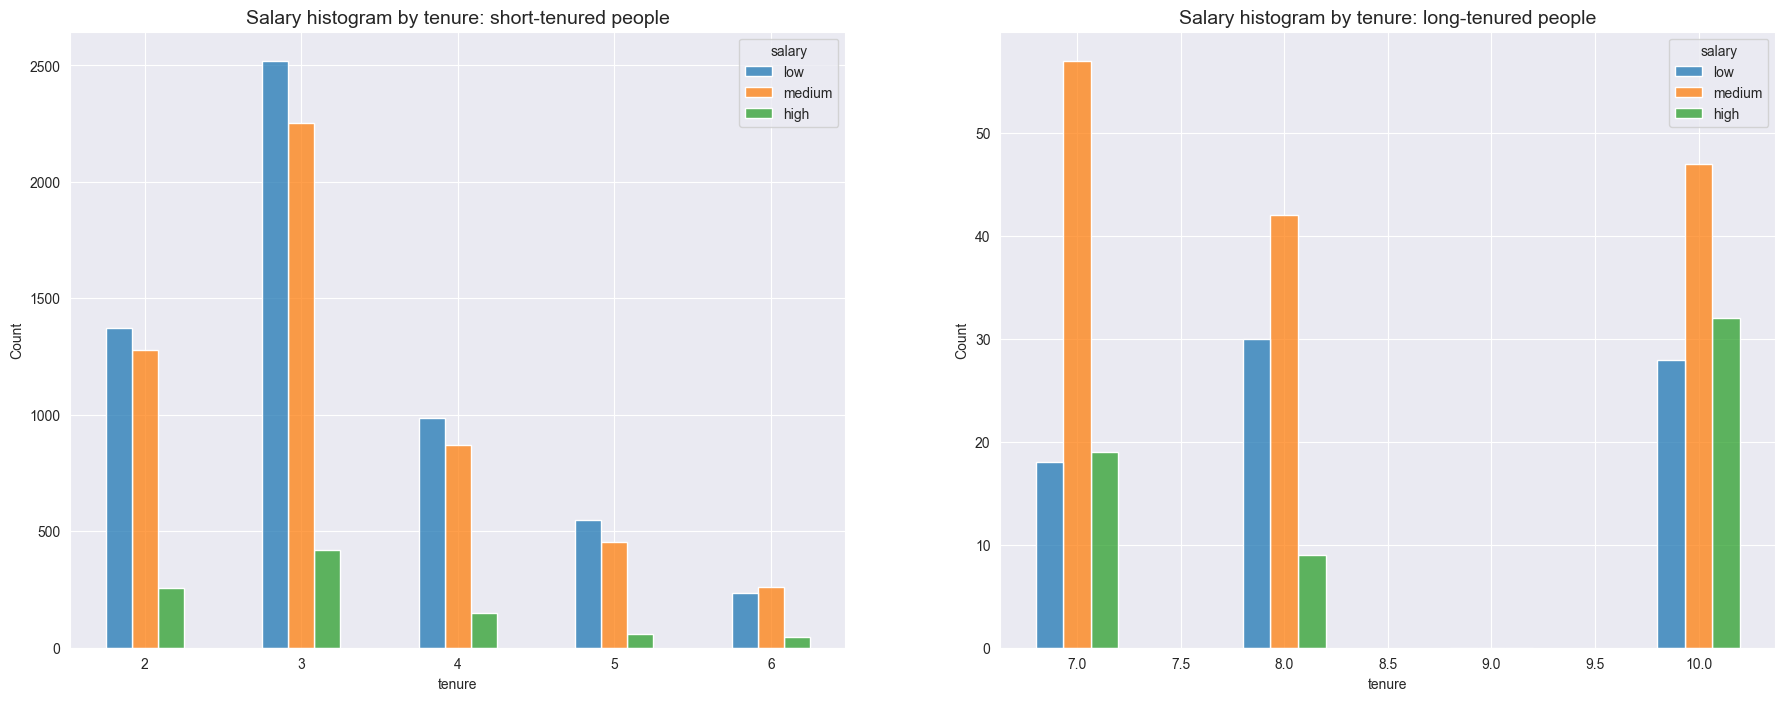

In [89]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = hr_data[hr_data['tenure'] < 7]

# Define long-tenured employees
tenure_long = hr_data[hr_data['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

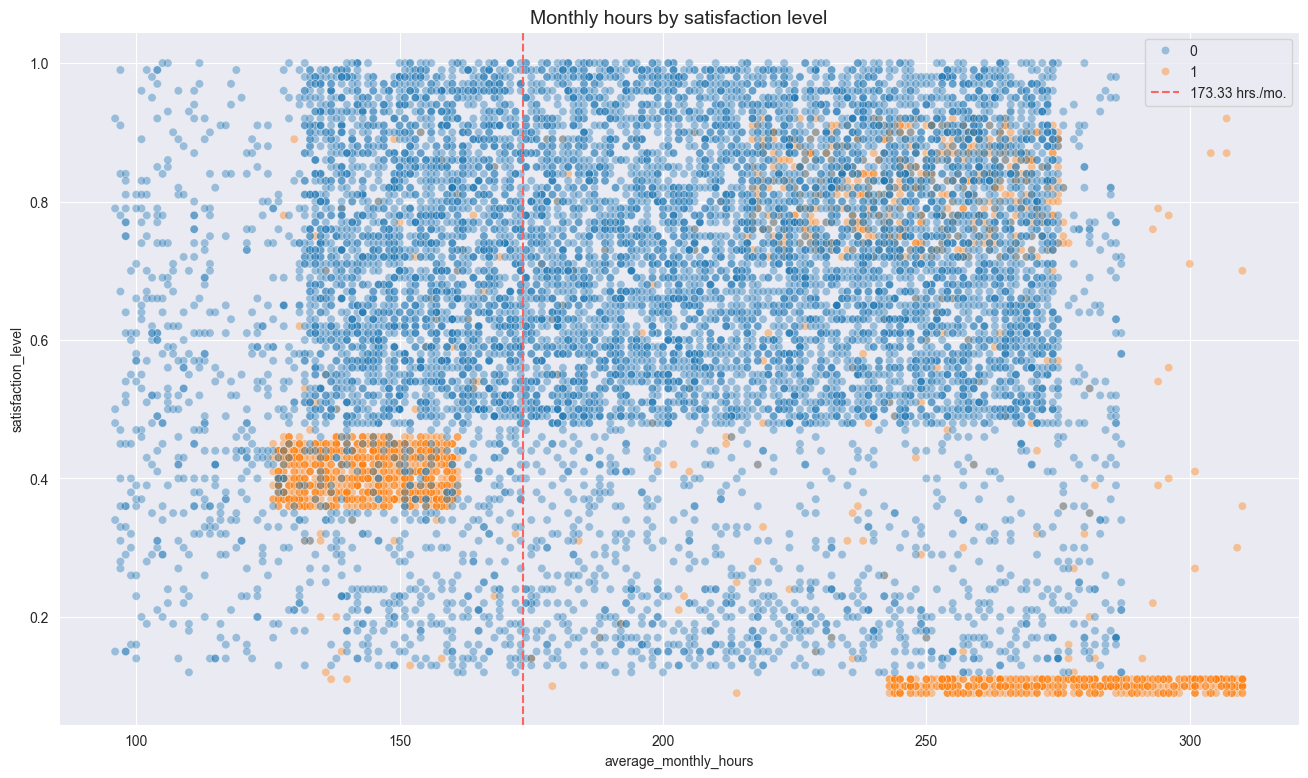

In [90]:
plt.figure(figsize=(16,9))
sns.scatterplot(data= hr_data, y='satisfaction_level',x='average_monthly_hours', hue='left',alpha = 0.4)
plt.axvline(x=173.33,label='173.33 hrs./mo.',color='#ff6361', ls='--')
plt.legend()
plt.title('Monthly hours by satisfaction level', fontsize='14')
plt.show()

We have 3 groups of people who left:
1. people with less than average working hours and a low  satisfaction level (also low evaluation scores from the scatterplot before)
2. people with a lot of working hours with a realy low satisfaction level. These people are certainly overworked and burned out.
3. people with a lot of working hours but also a high satisfaction level. It is possible that they are poached by other firms or are in denial about their stress levels

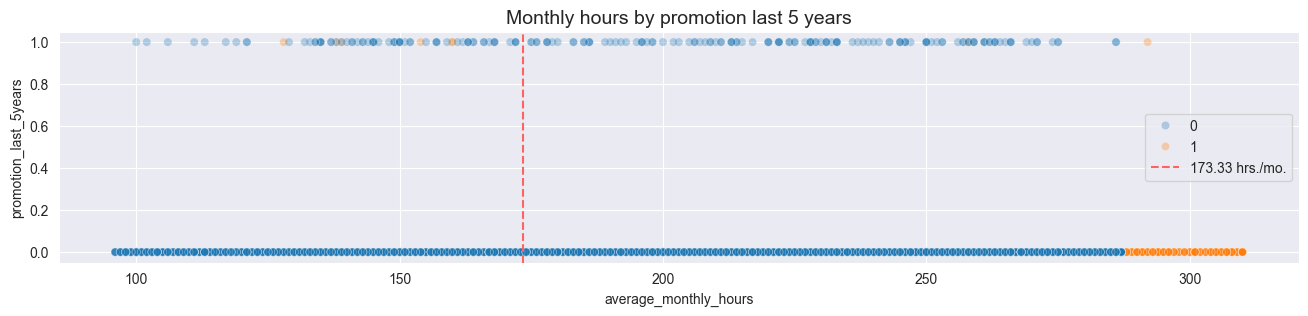

In [91]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=hr_data, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.3)
plt.axvline(x=173.33,label='173.33 hrs./mo.',color='#ff6361', ls='--')
plt.legend()
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours

In [92]:
hr_data['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

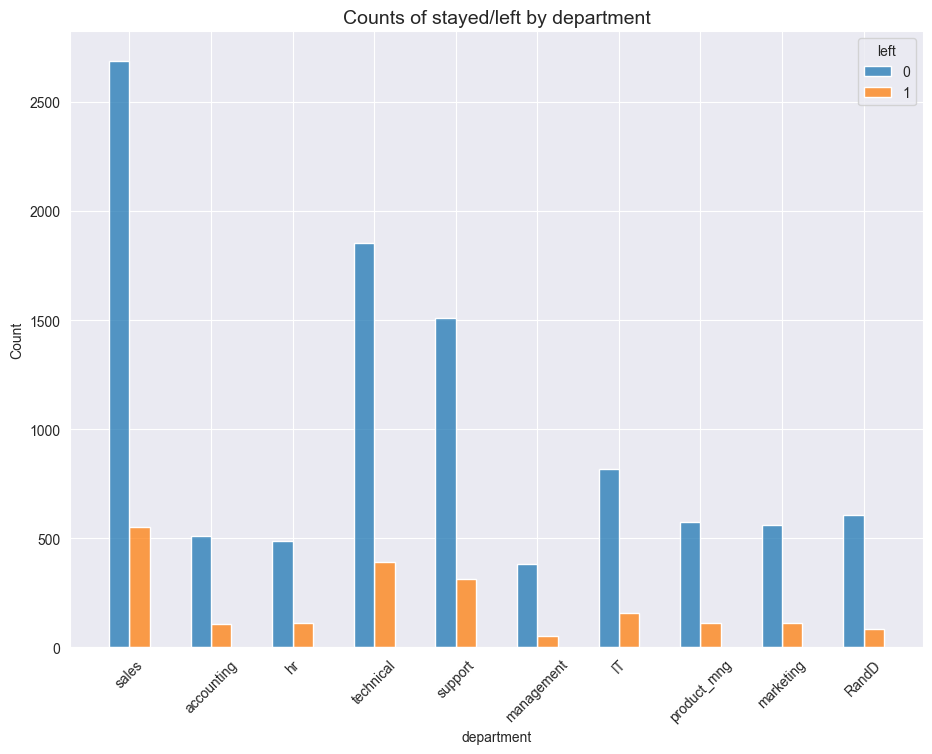

In [93]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=hr_data, x='department', hue='left', discrete=1,
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed

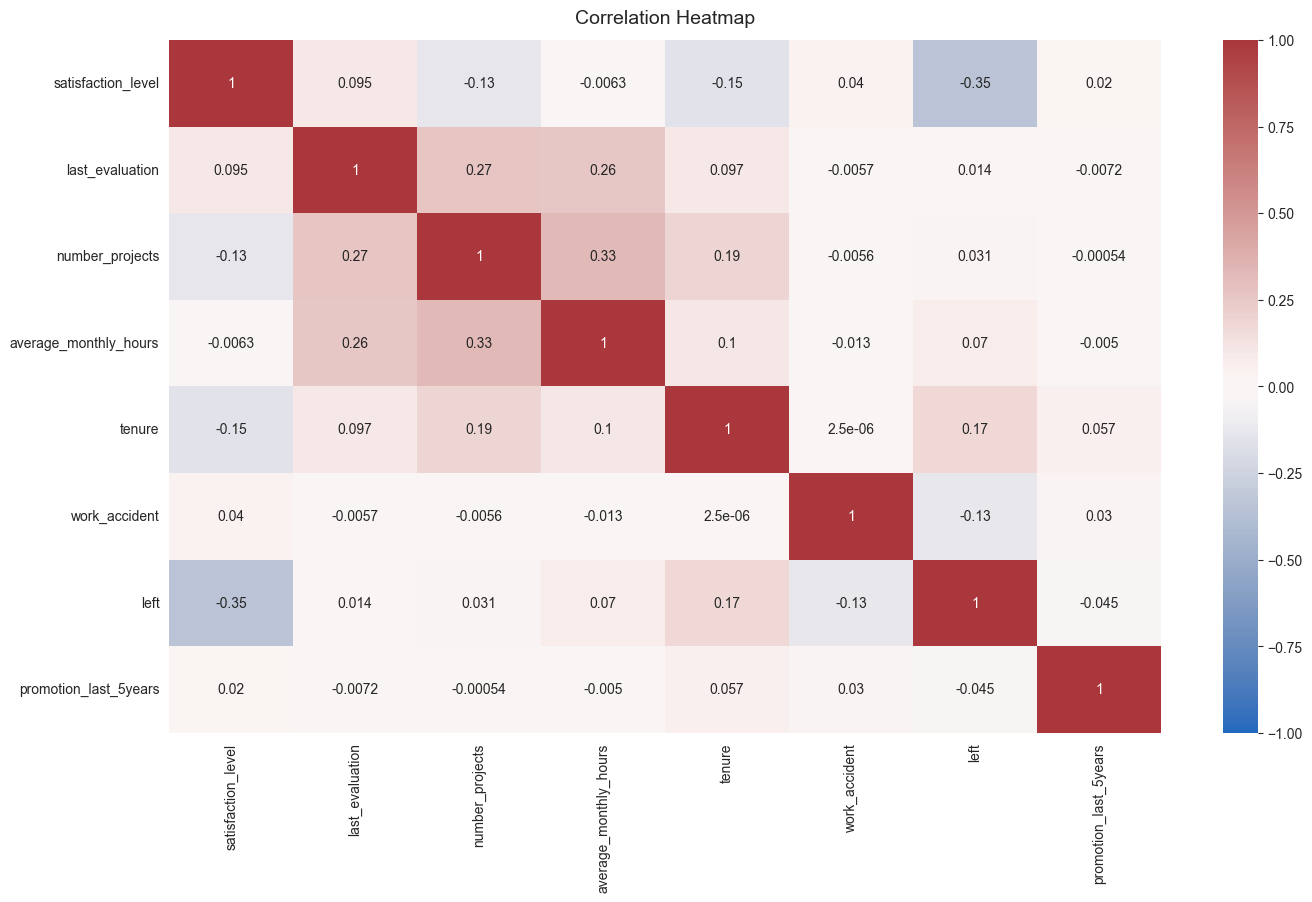

In [94]:
# Check for strong correlations between variables in the data.
# Plot a correlation heatmap
hr_data_heatmap = hr_data.drop(columns=['department','salary'])
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(hr_data_heatmap.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()

### PACE Construct Stage
The goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).


#### Logistic regression
**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

Encode non-numerical variables (department and salary)

In [95]:
# Copy the dataframe
hr_data_enc = hr_data.copy()

# Encode the `salary` column as an ordinal numeric category
hr_data_enc['salary'] = (
    hr_data_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
hr_data_enc = pd.get_dummies(hr_data_enc, drop_first=False)

# Display the new dataframe
hr_data_enc.head()

satisfaction_level  last_evaluation  number_projects  \
0                0.38             0.53                2   
1                0.80             0.86                5   
2                0.11             0.88                7   
3                0.72             0.87                5   
4                0.37             0.52                2   

   average_monthly_hours  tenure  work_accident  left  promotion_last_5years  \
0                    157       3              0     1                      0   
1                    262       6              0     1                      0   
2                    272       4              0     1                      0   
3                    223       5              0     1                      0   
4                    159       3              0     1                      0   

   salary  department_IT  department_RandD  department_accounting  \
0       0          False             False                  False   
1       1          False             False                  False   
2       1          False             False                  False   
3       0          False             False                  False   
4       0          False             False                  False   

   department_hr  department_management  department_marketing  \
0          False                  False                 False   
1          False                  False                 False   
2          False                  False                 False   
3          False                  False                 False   
4          False                  False                 False   

   department_product_mng  department_sales  department_support  \
0                   False              True               False   
1                   False              True               False   
2                   False              True               False   
3                   False              True               False   
4                   False              True               False   

   department_technical  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False

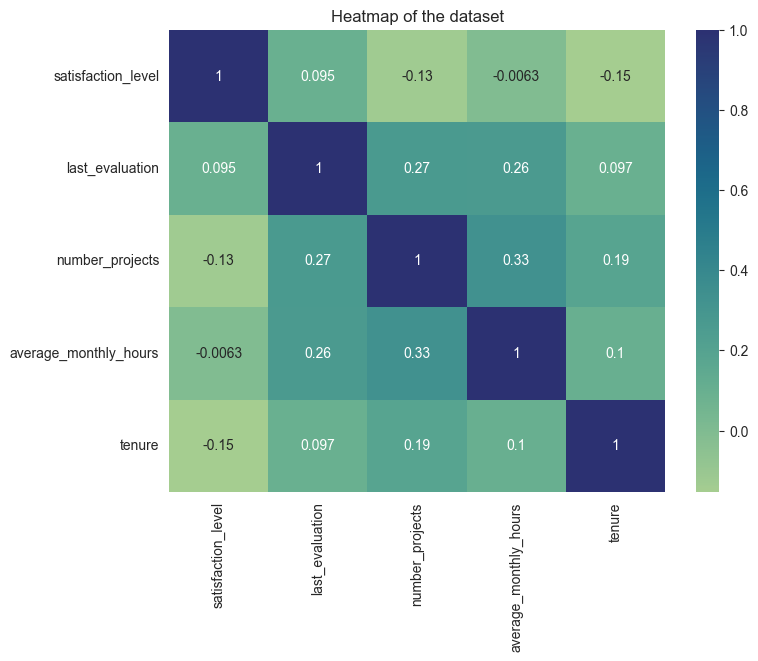

In [96]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(hr_data_enc[['satisfaction_level', 'last_evaluation', 'number_projects', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier.

In [97]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = hr_data_enc[(hr_data_enc['tenure'] >= lower_limit) & (hr_data_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

satisfaction_level  last_evaluation  number_projects  \
0                0.38             0.53                2   
2                0.11             0.88                7   
3                0.72             0.87                5   
4                0.37             0.52                2   
5                0.41             0.50                2   

   average_monthly_hours  tenure  work_accident  left  promotion_last_5years  \
0                    157       3              0     1                      0   
2                    272       4              0     1                      0   
3                    223       5              0     1                      0   
4                    159       3              0     1                      0   
5                    153       3              0     1                      0   

   salary  department_IT  department_RandD  department_accounting  \
0       0          False             False                  False   
2       1          False             False                  False   
3       0          False             False                  False   
4       0          False             False                  False   
5       0          False             False                  False   

   department_hr  department_management  department_marketing  \
0          False                  False                 False   
2          False                  False                 False   
3          False                  False                 False   
4          False                  False                 False   
5          False                  False                 False   

   department_product_mng  department_sales  department_support  \
0                   False              True               False   
2                   False              True               False   
3                   False              True               False   
4                   False              True               False   
5                   False              True               False   

   department_technical  
0                 False  
2                 False  
3                 False  
4                 False  
5                 False

Check the class balance in the data.

In [98]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, you might want to resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.

Isolate the outcome variable, which is the variable you want your model to predict.

In [99]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Select the features you want to use in your model. Consider which variables will help you predict the outcome variable, `left`.

In [100]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features
X.head()

satisfaction_level  last_evaluation  number_projects  \
0                0.38             0.53                2   
2                0.11             0.88                7   
3                0.72             0.87                5   
4                0.37             0.52                2   
5                0.41             0.50                2   

   average_monthly_hours  tenure  work_accident  promotion_last_5years  \
0                    157       3              0                      0   
2                    272       4              0                      0   
3                    223       5              0                      0   
4                    159       3              0                      0   
5                    153       3              0                      0   

   salary  department_IT  department_RandD  department_accounting  \
0       0          False             False                  False   
2       1          False             False                  False   
3       0          False             False                  False   
4       0          False             False                  False   
5       0          False             False                  False   

   department_hr  department_management  department_marketing  \
0          False                  False                 False   
2          False                  False                 False   
3          False                  False                 False   
4          False                  False                 False   
5          False                  False                 False   

   department_product_mng  department_sales  department_support  \
0                   False              True               False   
2                   False              True               False   
3                   False              True               False   
4                   False              True               False   
5                   False              True               False   

   department_technical  
0                 False  
2                 False  
3                 False  
4                 False  
5                 False

Split the data into training set and testing set. Don't forget to stratify based on the values in `y`, since the classes are unbalanced.

In [101]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Construct a logistic regression model and fit it to the training dataset.

In [102]:
log_clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

In [103]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

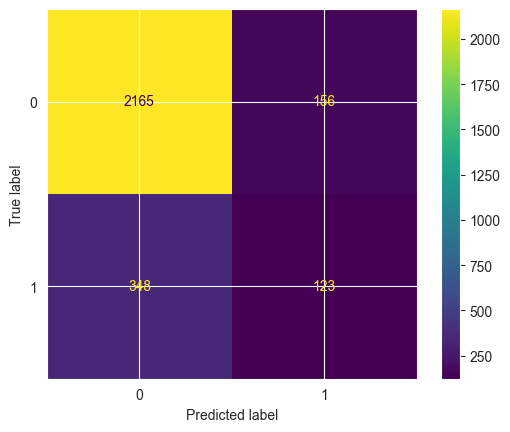

In [104]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [105]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

#### Tree-based Model
This approach covers implementation of Decision Tree and Random Forest.

In [106]:
# Isolate the outcome variable
y = hr_data_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [107]:
# Select the features
X = hr_data_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

satisfaction_level  last_evaluation  number_projects  \
0                0.38             0.53                2   
1                0.80             0.86                5   
2                0.11             0.88                7   
3                0.72             0.87                5   
4                0.37             0.52                2   

   average_monthly_hours  tenure  work_accident  promotion_last_5years  \
0                    157       3              0                      0   
1                    262       6              0                      0   
2                    272       4              0                      0   
3                    223       5              0                      0   
4                    159       3              0                      0   

   salary  department_IT  department_RandD  department_accounting  \
0       0          False             False                  False   
1       1          False             False                  False   
2       1          False             False                  False   
3       0          False             False                  False   
4       0          False             False                  False   

   department_hr  department_management  department_marketing  \
0          False                  False                 False   
1          False                  False                 False   
2          False                  False                 False   
3          False                  False                 False   
4          False                  False                 False   

   department_product_mng  department_sales  department_support  \
0                   False              True               False   
1                   False              True               False   
2                   False              True               False   
3                   False              True               False   
4                   False              True               False   

   department_technical  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False

In [108]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

Decision tree

In [109]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [110]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 2.25 s
Wall time: 2.27 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [111]:

# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Identify the best AUC score achieved by the decision tree model on the training set.

In [112]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

In [113]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

In [114]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

All of these scores from the decision tree model are strong indicators of good model performance.
But decision trees can be vulnerable to overfitting.

#### Random forest
Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [115]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [116]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 14min 4s
Wall time: 14min 5s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [117]:
# check the best AUC score
rf1.best_score_

0.9804250949807172

In [118]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [119]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


In [120]:
# Define a path for saving the model
path = 'D:/Portfolio/Providing data-driven suggestions for HR/models'

Define a function that gets all the scores from a model's predictions.

In [121]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

In [122]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

In [123]:
def write_pickle(path, model_object, save_as:str):
    '''
    In:
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [124]:
def read_pickle(path, saved_model_name:str):
    '''
    In:
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out:
        model: the pickled model
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [125]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [126]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [127]:
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

In [128]:
tree1_importances = pd.DataFrame(rf1.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)
# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

gini_importance
satisfaction_level             0.493518
number_projects                0.164313
last_evaluation                0.146839
tenure                         0.116408
average_monthly_hours          0.077554
department_RandD               0.000244
salary                         0.000209
department_technical           0.000181
department_IT                  0.000152
department_marketing           0.000151
department_support             0.000125
department_hr                  0.000122
department_accounting          0.000095
department_sales               0.000053
work_accident                  0.000013
department_product_mng         0.000010
department_management          0.000010
promotion_last_5years          0.000002

We have very high evaluation scores. It is possible that there is some data leakage occurring.
- It is possible that the satisfaction survey was conducted after an employee had handed in their resignation or during an exit interview. Even if this is not the case, a massive drop in satisfaction often happens immediately followed by a departure.
- It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. Therefore, the `satisfaction_level` column will be dropped and a new feature, which roughly captures whether an employee is overworked will be created.

In [129]:
hr_data2 = hr_data_enc.drop('satisfaction_level', axis=1)
hr_data2.head()

last_evaluation  number_projects  average_monthly_hours  tenure  \
0             0.53                2                    157       3   
1             0.86                5                    262       6   
2             0.88                7                    272       4   
3             0.87                5                    223       5   
4             0.52                2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
1              0     1                      0       1          False   
2              0     1                      0       1          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [130]:
# Create `overworked` column. For now, it's identical to average monthly hours.
hr_data2['overworked'] = hr_data2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', hr_data2['overworked'].max())
print('Min hours:', hr_data2['overworked'].min())

Max hours: 310
Min hours: 96


The threshold of 180 hours was selected because research by Ochiai et al. (2023) indicates that psychological responses, including irritability, anxiety, and depression, increase significantly when monthly working hours reach or exceed this level.

In [131]:
# Define `overworked` as working > 180 hrs/week
hr_data2['overworked'] = (hr_data2['overworked'] > 180).astype(int)

# Display first few rows of new column
hr_data2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [132]:
# Drop the `average_monthly_hours` column
hr_data2 = hr_data2.drop('average_monthly_hours', axis=1)
hr_data2.head()

last_evaluation  number_projects  tenure  work_accident  left  \
0             0.53                2       3              0     1   
1             0.86                5       6              0     1   
2             0.88                7       4              0     1   
3             0.87                5       5              0     1   
4             0.52                2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
1               False                 False           1  
2               False                 False           1  
3               False                 False           1  
4               False                 False           0

In [133]:
# Isolate the outcome variable
y = hr_data2['left']

# Select the features
X = hr_data2.drop('left', axis=1)

In [134]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Round 2

In [135]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [136]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 1.8 s
Wall time: 1.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [137]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [138]:
# Check best AUC score on CV
tree2.best_score_

0.9580391349227969

In [139]:
# Write pickle
write_pickle(path, tree2, 'hr_tree2')

In [140]:
tree2 = read_pickle(path, 'hr_tree2')

In [141]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.860901  0.900204  0.879558  0.958968  0.958039


#### Random forest - Round 2

In [142]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [143]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

CPU times: total: 9min 43s
Wall time: 9min 43s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [144]:
rf2.best_score_

0.9651311340817097

In [145]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.860901  0.900204  0.879558  0.958968  0.958039
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.859793  0.880763  0.869755  0.956299  0.965131


In [146]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest2 test   0.861217  0.909639  0.884766   0.96064  0.940219

This seems to be a stable, well-performing final model.

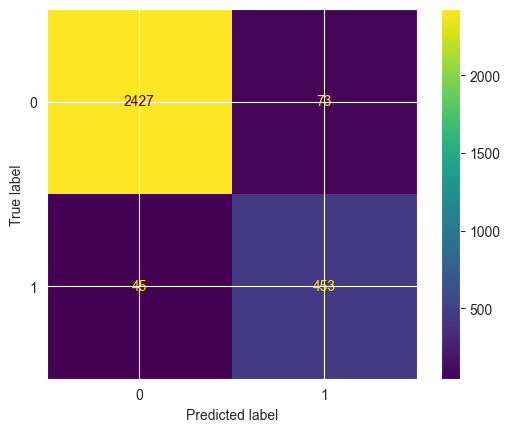

In [147]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features in the random forest model.

#### Decision tree splits

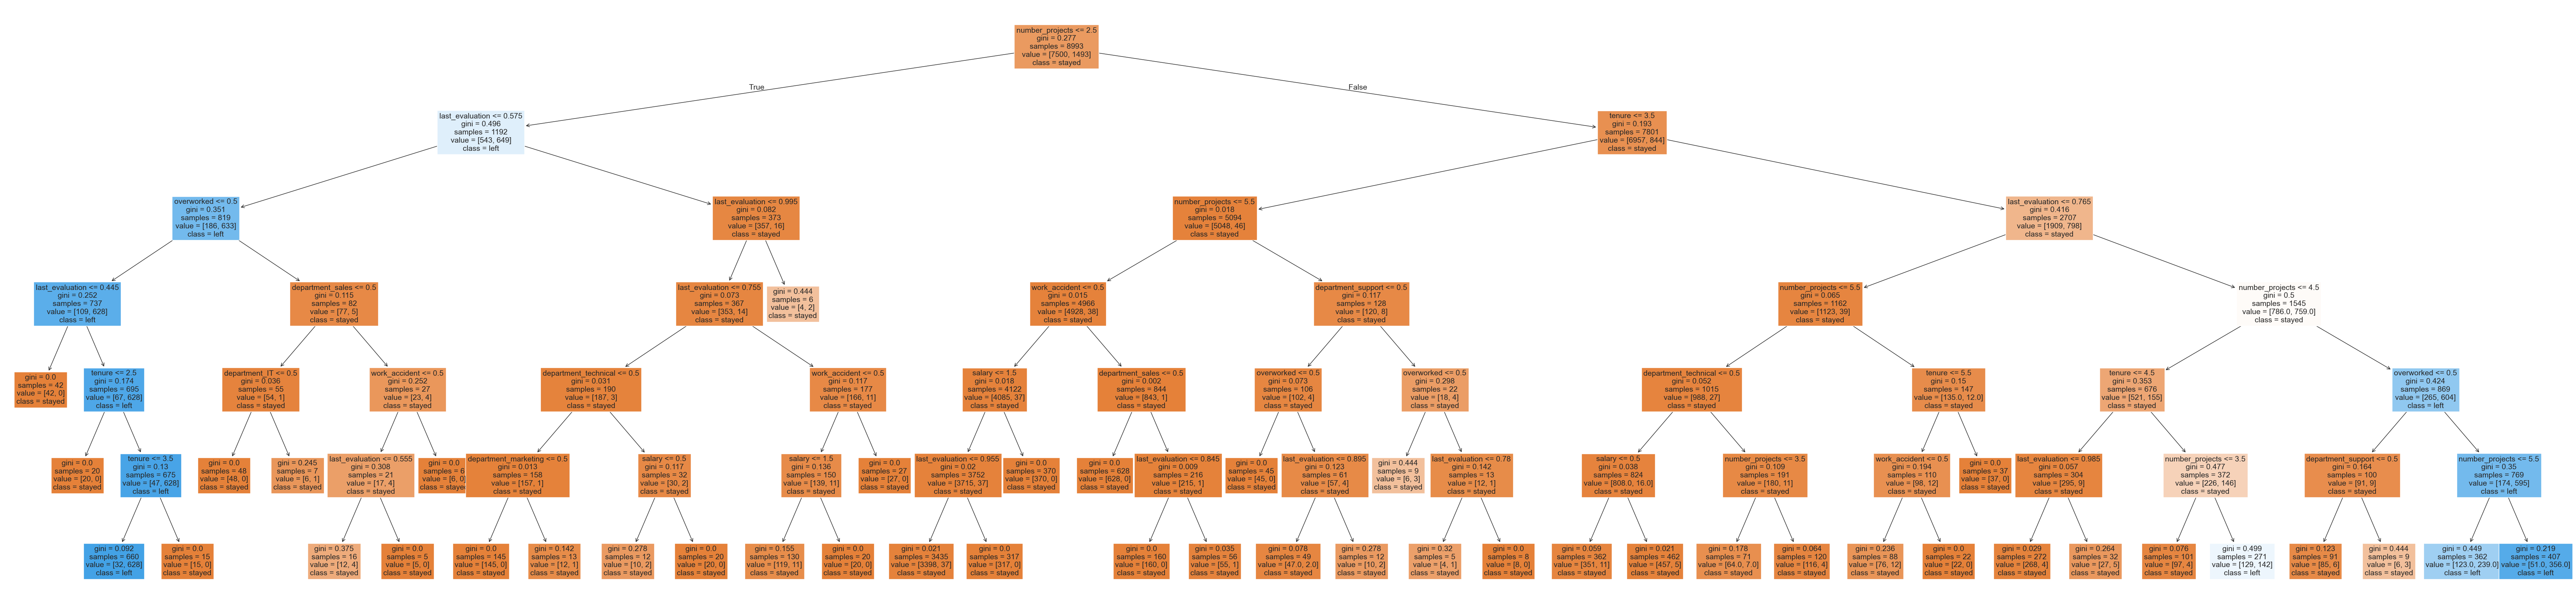

In [148]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [149]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.342690
number_projects              0.338960
tenure                       0.217766
overworked                   0.097393
department_support           0.001067
work_accident                0.000733
salary                       0.000490
department_technical         0.000343
department_sales             0.000342
department_IT                0.000138
department_marketing         0.000078

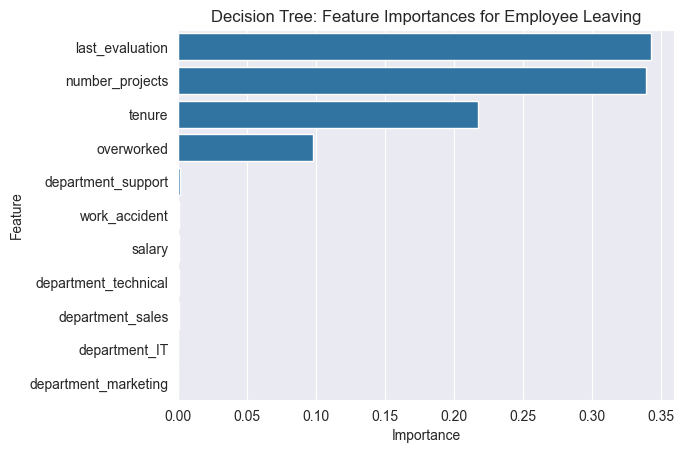

In [150]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, last_evaluation, number_project, tenure, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left.

#### Random forest feature importance

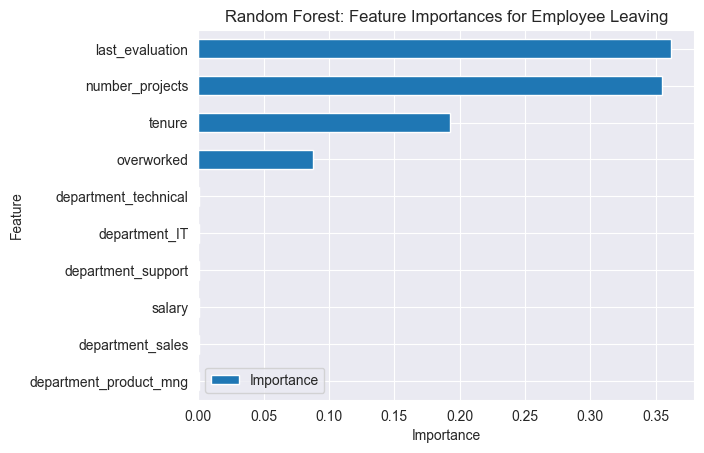

In [151]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

In [152]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
rf2_importances = pd.DataFrame(rf2.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
rf2_importances = rf2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
rf2_importances = rf2_importances[rf2_importances['gini_importance'] != 0]
rf2_importances

gini_importance
last_evaluation                0.361592
number_projects                0.354666
tenure                         0.192809
overworked                     0.087708
department_technical           0.000569
department_IT                  0.000560
department_support             0.000522
salary                         0.000498
department_sales               0.000465
department_product_mng         0.000179
department_RandD               0.000099
work_accident                  0.000094
department_marketing           0.000081
department_accounting          0.000076
department_hr                  0.000058
department_management          0.000011
promotion_last_5years          0.000011

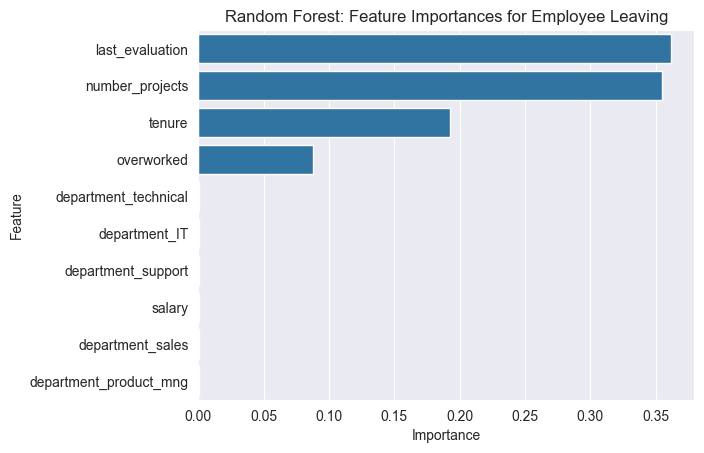

In [153]:
sns.barplot(data=rf2_importances[:10], x="gini_importance", y=rf2_importances[:10].index, orient='h')
plt.title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The plot above shows that in this random forest model, last_evaluation, number_project, tenure, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left, and they are the same as the ones used by the decision tree model.